In [28]:
%config IPCompleter.greedy=True

# CARNEGIE MELLON UNIVERSITY
**Name**: Junxiao Guo <br/>
**Andrew ID**: junxiaog <br/>
**Course**: DATA, INFERENCE & APPLIED MACHINE LEARNING (COURSE 18-785)<br/>
**ASSIGNMENT 2** <br/>

# Question 1
Using the World Bank Indicators, download data for “GDP per capita (current US$)” and “Malnutrition prevalence, weight for age (% of children under 5).”

What kind of relationship do you expect? Make a scatter plot of malnutrition against GDP per capita (using all available years and countries). What kind of relationship do you see? Make a graph for developing regions (six types and use one color for each). Make a graph for income levels (four types and one color for each). Carefully label all graphs and provide legends.# Q1_1

In [29]:
import pandas as pd
import sys
import matplotlib.pyplot as plt

f1 = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_129284/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_129284.csv',skiprows=4)
f2 = pd.read_csv('API_SH.STA.MALN.ZS_DS2_en_csv_v2_49604/API_SH.STA.MALN.ZS_DS2_en_csv_v2_49604.csv',skiprows=4)
codeArr = f1['Country Code']
assert list(f1['Country Code']) == list(f2['Country Code']), "Country Code doesn't match"
res = []
idxarr = []
for i in range(len(codeArr)):
    tmplist = list(f1.iloc[i][4:])
    tmplist2 = list(f2.iloc[i][4:])
    for j,k in zip(tmplist,tmplist2):
        if j>0 and k>0:
            idxarr.append(i)
            res.append((j,k))
            
df_regions = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_129284/Metadata_Country_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_129284.csv')
cc = list(df_regions['Country Code'])
reg = list(df_regions['Region'])
icm = list(df_regions['IncomeGroup'])
curr_dict = {}
for i,j,k in zip(cc,reg,icm):
    curr_dict[i] = (j,k)
# print(curr_dict)
regions = {}
income_levels = {}

for i in reg:
    if pd.isna(i) or i=='North America' or i in regions:
        continue
    regions[i] = []
for j in icm:
    if pd.isna(j) or j in income_levels:
        continue
    income_levels[j] = []

curr_residx = 0
for k in (idxarr):
    if codeArr[k] == 'INX':
        curr_residx+=1
        continue
    curr_region = curr_dict[codeArr[k]][0]
    curr_income_level = curr_dict[codeArr[k]][1]
    if not pd.isna(curr_region) and curr_region!='North America':
        regions[curr_region].append(res[curr_residx])
    if not pd.isna(curr_income_level):
        income_levels[curr_income_level].append(res[curr_residx])
    curr_residx+=1



## 1.1 Scatter plot of malnutrition against GDP per capita

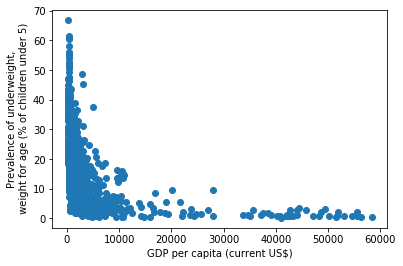

In [30]:
plt.scatter([i[0] for i in res],[i[1] for i in res])
plt.ylabel("Prevalence of underweight,\n weight for age (% of children under 5)")
plt.xlabel("GDP per capita (current US\$)")
plt.show()


## 1.2 Graph for developing regions (six types and use one color for each).

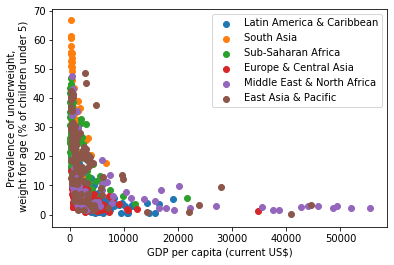

In [31]:
for i in regions.keys():
    plt.scatter([j[0] for j in regions[i]],[j[1] for j in regions[i]],label=i)
    
plt.legend()
plt.ylabel("Prevalence of underweight,\n weight for age (% of children under 5)")
plt.xlabel("GDP per capita (current US\$)")
plt.show()

## 1.3 Graph for income levels (four types and one color for each).

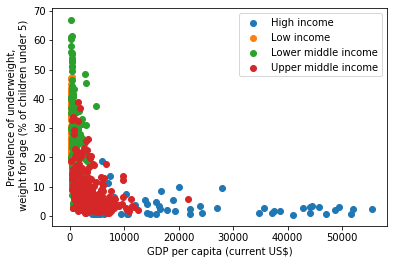

In [32]:
for i in income_levels.keys():
    plt.scatter([j[0] for j in income_levels[i]],[j[1] for j in income_levels[i]],label=i)

plt.legend()
plt.ylabel("Prevalence of underweight,\n weight for age (% of children under 5)")
plt.xlabel("GDP per capita (current US\$)")
plt.show()

## Question 2
Using Quandl, download data, synchronize the time stamps and plot time series for the prices of Wheat, Crude Oil and Gold in $ on the same graph. Indicate the maximum and minimum prices in all three time series using coloured dots. Use a legend to explain each one.